In [1]:
import pandas as pd
from datetime import datetime

In [310]:
df=pd.read_csv('C:/Users/User/API/2.csv',sep=';',encoding='cp1252')

In [311]:
df.head()

,id,periodid,startdate,enddate,disc,isGk,isShared,isUsn,isEnvd,isBudget,...,mainSystem1420,mainSystem1421,mainSystem1422,mainSystem1423,mainSystem1424,mainSystem1425,mainSystem1426,mainSystem1427,mainSystem1428,notMainSystem
0,3,20861,01.04.2017 0:00,30.04.2017 0:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,3,20862,01.05.2017 0:00,31.05.2017 0:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,3,20864,01.06.2017 0:00,30.06.2017 0:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,3,20865,01.07.2017 0:00,31.07.2017 0:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,20866,01.08.2017 0:00,31.08.2017 0:00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [312]:
df.id.nunique()

4260

In [313]:
unique_id=df.id.unique()
unique_id

array([      3,      29,      42, ..., 1696323, 1696385, 1696463],
      dtype=int64)

In [314]:
df['enddate'] = pd.to_datetime(df.enddate, format='%d.%m.%Y %H:%M')
df['startdate']= pd.to_datetime(df.startdate, format='%d.%m.%Y %H:%M')
df['paid_time']= (pd.to_datetime(df.paidDate, format='%d.%m.%Y %H:%M')-df.startdate).dt.days

In [315]:
client_data=df.groupby('id',as_index=False).agg({'startdate':'max'}).rename({'startdate':'last_month'},axis=1)
df['last_month']=df.groupby(['id'])['startdate'].transform(max)

In [553]:
end_of_time=max(df.last_month)
end_of_time

Timestamp('2019-11-01 00:00:00')

In [317]:
df.paid_time

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
102451     NaN
102452     3.0
102453    10.0
102454    34.0
102455   -15.0
Name: paid_time, Length: 102456, dtype: float64

In [318]:
client_data['is_gone']=(client_data.last_month!='2019-11-01')

In [319]:
client_data.groupby('is_gone').count()

,id,last_month
is_gone,,
False,2834,2834
True,1426,1426


In [526]:
client_data.head(30)

,id,last_month,is_gone,mainSystem1425max,mainSystem1425min,mainSystem1425cur,mainSystem1418max,mainSystem1418min,mainSystem1418cur,mainSystem1409max,...,incidentReccur,isNssmax,isNssmin,isNsscur,mainSystem1419max,mainSystem1419min,mainSystem1419cur,monthServiceSummax,monthServiceSummin,monthServiceSumcur
0,3,2017-12-01,True,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN
1,29,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.000000,32752.00
2,42,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.017027,35063.03
3,63,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.000000,24700.00
4,65,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN
5,102,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.016086,12646.87
6,108,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.016113,3983.62
7,123,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.000000,18730.00
8,128,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN
9,132,2019-11-01,False,1.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.387566,10289.16


In [321]:
excepted_columns=['paidDate','startdate','enddate','last_month']

In [322]:
col

'sixMonthDebt'

In [630]:
eps=1e-9
columns=list(set(list(df))-set('id'))
for id in unique_id:
    print(id,end=' ')
    for col in columns:
        if col in excepted_columns:
            continue
        if df.loc[df.id==id].last_month.max()<end_of_time:
            max_value=df.loc[(df.id==id)&(df.startdate>df.last_month-pd.Timedelta(days=182))][col].astype(float).max()
            min_value=df.loc[(df.id==id)&(df.startdate>df.last_month-pd.Timedelta(days=182))][col].astype(float).min()
            cur_value=df.loc[(df.id==id)&(df.last_month==df.startdate)][col].astype(float).max()
        else:
            max_value=df.loc[(df.id==id)&(df.startdate>df.last_month-pd.Timedelta(days=182+75))&
                                         (df.startdate<end_of_time)][col].astype(float).max()
            min_value=df.loc[(df.id==id)&(df.startdate>df.last_month-pd.Timedelta(days=182+75))&
                                         (df.startdate<end_of_time)][col].astype(float).min()
            cur_value=df.loc[(df.id==id)&(df.startdate>df.last_month-pd.Timedelta(days=75))&
                                         (df.startdate<end_of_time)][col].astype(float).max()
            

        client_data.loc[client_data.id==id,col+'max']=(cur_value+eps)/(max_value+eps)
        client_data.loc[client_data.id==id,col+'min']=(cur_value+eps)/(min_value+eps)
        client_data.loc[client_data.id==id,col+'cur']=cur_value
        

3 29 42 63 65 102 108 123 128 132 137 185 211 246 251 319 338 342 361 447 535 538 555 557 589 612 640 710 711 712 722 836 851 877 894 909 914 930 962 968 969 1064 1103 1150 1211 1276 1325 1337 1345 1353 1355 1423 1458 1568 1602 1643 1776 1820 1835 1890 1907 1935 2024 2032 2055 2064 2065 2067 2071 2073 2074 2075 2076 2077 2078 2090 2129 2130 2132 2143 2145 2148 2152 2163 2244 2260 2302 2365 2368 2369 2391 2411 2416 2417 2455 2509 2532 2535 2547 2549 2596 2670 2742 2748 2787 2798 2805 2819 2820 2821 2840 2845 2871 2874 2884 2968 3012 3208 3210 3212 3227 3242 3250 3309 3342 3385 3503 3679 3815 3872 3915 4021 4026 4043 4121 4134 4149 4185 4191 4193 4194 4218 4303 4394 4412 4426 4458 4486 4488 4515 4518 4536 4541 4543 4553 4570 4614 4714 4715 4718 4725 4730 4741 4752 4766 4778 4781 4798 4800 4801 4804 4807 4825 4827 4828 4829 4842 4855 4861 4862 4872 4883 4886 4891 4950 4982 5003 5012 5016 5035 5042 5094 5111 5129 5134 5193 5222 5230 5285 5293 5297 5299 5314 5327 5331 5336 5342 5357 5395 54

21409 21414 21418 21459 21464 21465 21484 21496 21497 21498 21499 21511 21514 21580 21596 21597 21600 21601 21607 21611 21626 21627 21637 21638 21651 21660 21661 21681 21686 21706 21722 21750 21751 21763 21766 21780 21783 21809 21812 21813 21816 21821 21867 21900 21902 21936 21947 21948 21994 22035 22039 22069 22071 22126 22129 22132 22133 22134 22135 22142 22146 22149 22152 22172 22179 22201 22222 22228 22236 22238 22250 22255 22294 22315 22334 22366 22388 22397 22454 22469 22480 22481 22482 22483 22493 22517 22544 22551 22565 22591 22601 22647 22654 22745 22778 22783 22822 22836 22871 22919 22925 22992 23105 23129 23130 23131 23174 23265 23288 23329 23358 23363 23364 23369 23390 23445 23466 23505 23544 23599 23632 23633 23634 23637 23659 23718 23720 23758 23762 23766 23767 23772 23775 23778 23815 23817 23825 23864 23877 23888 23889 23897 23898 23911 23916 23923 23927 23937 23938 23945 23952 23962 23995 24093 24124 24136 24185 24186 24207 24228 24252 24284 24311 24327 24353 24391 2441

311231 311234 311237 313109 313160 313163 313742 321236 321239 322850 328870 331652 331656 331658 331662 331665 347104 347105 347111 347112 347113 352718 352720 353651 354592 355333 360803 360804 360810 362486 366876 366880 366964 366967 366969 366990 367028 367029 367169 367607 367686 367703 374004 374005 374099 374280 374286 374292 374295 374296 374324 374354 374409 374589 374623 374625 374626 374627 374628 382004 392255 392261 392262 392268 392271 392275 392279 392283 392293 392304 392316 392322 392492 392567 392569 392571 392573 392574 392803 401496 414053 417401 417404 417428 417595 417605 469962 470668 472106 484902 484909 495236 495254 495262 495443 495444 495457 495463 495469 495486 495489 525119 525133 553354 553363 553561 553565 553593 553798 553868 553869 553881 553884 554329 554508 614841 637904 637923 637935 637941 637944 637945 637948 637949 637954 637956 637957 637958 638161 640478 642712 642842 642947 642983 662307 662334 662431 662591 662600 662602 662712 662909 663093

1619138 1619139 1619142 1619143 1619148 1619150 1619151 1619153 1619156 1619158 1619161 1619162 1619163 1620720 1622477 1622481 1622484 1622485 1622487 1622498 1622503 1622520 1622527 1626377 1627468 1627502 1628924 1628926 1629624 1629627 1629629 1629636 1629638 1629644 1629650 1629660 1629667 1629669 1629671 1630843 1630866 1630867 1631845 1631847 1631850 1631851 1631859 1632872 1632875 1632881 1632882 1632884 1632885 1633412 1633420 1633430 1633435 1633800 1633807 1633808 1633809 1633813 1633814 1633957 1633961 1633964 1633970 1633976 1633977 1633980 1633981 1633996 1634006 1634008 1634009 1634011 1634014 1634016 1634017 1634020 1634536 1634537 1634540 1634552 1634553 1634557 1634559 1634565 1634566 1634573 1634576 1634580 1634586 1634591 1634592 1634593 1634594 1634967 1635288 1636503 1637118 1637121 1637124 1637126 1637127 1637129 1637137 1637415 1637630 1637631 1637632 1637636 1637641 1637647 1637649 1637650 1637660 1637669 1637670 1638576 1638580 1639132 1639140 1639143 1639146 

In [632]:
client_data.shape

(4260, 267)

In [633]:
client_data1=client_data.fillna(0)

In [634]:
from sklearn.model_selection import train_test_split
import random
import numpy as np
import torch
from torch.optim import Adam, lr_scheduler

random.seed(1234)
np.random.seed(1234)
torch.manual_seed(1234)
torch.cuda.manual_seed(1234)
torch.backends.cudnn.deterministic = True

In [635]:
X=client_data1.drop(['is_gone','last_month','id'],axis=1)
y=client_data1.is_gone

In [636]:
X.shape,y.shape

((4260, 264), (4260,))

In [637]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [638]:
X_train.shape

(3408, 264)

In [639]:
X_train=torch.DoubleTensor(X_train.values)
X_test=torch.DoubleTensor(X_test.values)
y_train=torch.LongTensor(y_train.values)
y_test=torch.LongTensor(y_test.values)

In [640]:
X_train.shape

torch.Size([3408, 264])

In [641]:
batch_size=3408
lr=1e-4
num_epoch=3000
step_size=200
gamma=0.7

In [642]:
class API_net(torch.nn.Module):
    def __init__(self):
        super(API_net,self).__init__()
        self.fc1=torch.nn.Linear(264,500)
        self.act1=torch.nn.ReLU()
        self.fc2=torch.nn.Linear(500,500)
        self.act2=torch.nn.Tanh()
        self.fc3=torch.nn.Linear(500,2)
    
    def forward(self,x):
        x=self.fc1(x)
        x=self.act1(x)
        x=self.fc2(x)
        x=self.act2(x)
        x=self.fc3(x)
        return x

model=API_net().double()

In [643]:
model=API_net().double()
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
loss=torch.nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=lr)
scheduler = lr_scheduler.StepLR(optimizer,
                                step_size=step_size,
                                gamma=gamma)
    
train_accuracy_history=[]
train_loss_history=[]
test_accuracy_history=[]
test_loss_history=[]
    
for epoch in range(num_epoch):
    print()
    print('Epoch {}/{}:'.format(epoch, num_epoch - 1), flush=True)
        
    for phase in ['train','test']:
        if phase=='train':
            running_loss = 0
            running_acc = 0
            order=np.random.permutation(len(X_train))
            for start_index in range(0,len(X_train),batch_size):
                optimizer.zero_grad()
                model.train()
                batch_indexes=order[start_index:start_index+batch_size]
                X_batch=X_train[batch_indexes].to(device)
                y_batch=y_train[batch_indexes].to(device)
                preds=model.forward(X_batch)
                loss_value=loss(preds,y_batch)
                preds_class=preds.argmax(dim=1)
                loss_value.backward()
                optimizer.step()
                running_loss+=loss_value.data.cpu()
                running_acc+=(preds_class==y_batch).float().mean().data.cpu()
            train_accuracy_history.append(running_acc/(len(X_train)/batch_size))
            train_loss_history.append(running_loss/(len(X_train)/batch_size))
        else:
#             continue
            model.eval()
            preds=model.forward(X_test)
            loss_value=loss(preds,y_test).data
            preds_class=preds.argmax(dim=1)
            test_accuracy_history.append((preds_class==y_test).float().mean().data)
            test_loss_history.append(loss_value)
    print('train loss ',train_loss_history[-1])
    print('train acc  ',train_accuracy_history[-1])
    print('test loss  ',test_loss_history[-1])
    print('test acc   ',test_accuracy_history[-1])


Epoch 0/2999:
train loss  tensor(0.7041, dtype=torch.float64)
train acc   tensor(0.5754)
test loss   tensor(0.6849, dtype=torch.float64)
test acc    tensor(0.5962)

Epoch 1/2999:
train loss  tensor(0.6986, dtype=torch.float64)
train acc   tensor(0.5989)
test loss   tensor(0.6827, dtype=torch.float64)
test acc    tensor(0.6150)

Epoch 2/2999:
train loss  tensor(0.6943, dtype=torch.float64)
train acc   tensor(0.6162)
test loss   tensor(0.6829, dtype=torch.float64)
test acc    tensor(0.6279)

Epoch 3/2999:
train loss  tensor(0.6900, dtype=torch.float64)
train acc   tensor(0.6320)
test loss   tensor(0.6919, dtype=torch.float64)
test acc    tensor(0.6326)

Epoch 4/2999:
train loss  tensor(0.6956, dtype=torch.float64)
train acc   tensor(0.6403)
test loss   tensor(0.6774, dtype=torch.float64)
test acc    tensor(0.6444)

Epoch 5/2999:
train loss  tensor(0.6810, dtype=torch.float64)
train acc   tensor(0.6508)
test loss   tensor(0.7064, dtype=torch.float64)
test acc    tensor(0.6526)

Epoch 6/2

train loss  tensor(1.1817, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(1.1714, dtype=torch.float64)
test acc    tensor(0.6831)

Epoch 51/2999:
train loss  tensor(1.1763, dtype=torch.float64)
train acc   tensor(0.6784)
test loss   tensor(1.1828, dtype=torch.float64)
test acc    tensor(0.6843)

Epoch 52/2999:
train loss  tensor(1.1890, dtype=torch.float64)
train acc   tensor(0.6796)
test loss   tensor(1.1961, dtype=torch.float64)
test acc    tensor(0.6866)

Epoch 53/2999:
train loss  tensor(1.2026, dtype=torch.float64)
train acc   tensor(0.6802)
test loss   tensor(1.2130, dtype=torch.float64)
test acc    tensor(0.6843)

Epoch 54/2999:
train loss  tensor(1.2162, dtype=torch.float64)
train acc   tensor(0.6802)
test loss   tensor(1.2071, dtype=torch.float64)
test acc    tensor(0.6878)

Epoch 55/2999:
train loss  tensor(1.2134, dtype=torch.float64)
train acc   tensor(0.6799)
test loss   tensor(1.2199, dtype=torch.float64)
test acc    tensor(0.6890)

Epoch 56/2999:
trai

train loss  tensor(1.2764, dtype=torch.float64)
train acc   tensor(0.6687)
test loss   tensor(1.2890, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 101/2999:
train loss  tensor(1.2794, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(1.2882, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 102/2999:
train loss  tensor(1.2775, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(1.2811, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 103/2999:
train loss  tensor(1.2723, dtype=torch.float64)
train acc   tensor(0.6687)
test loss   tensor(1.2778, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 104/2999:
train loss  tensor(1.2683, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(1.2680, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 105/2999:
train loss  tensor(1.2603, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(1.2681, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 106/2999

train loss  tensor(1.1228, dtype=torch.float64)
train acc   tensor(0.6693)
test loss   tensor(1.1184, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 151/2999:
train loss  tensor(1.1193, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(1.1133, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 152/2999:
train loss  tensor(1.1126, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(1.1027, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 153/2999:
train loss  tensor(1.1025, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(1.1125, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 154/2999:
train loss  tensor(1.1093, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(1.1141, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 155/2999:
train loss  tensor(1.1131, dtype=torch.float64)
train acc   tensor(0.6690)
test loss   tensor(1.1078, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 156/2999

train loss  tensor(0.8223, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(0.8101, dtype=torch.float64)
test acc    tensor(0.6737)

Epoch 201/2999:
train loss  tensor(0.8177, dtype=torch.float64)
train acc   tensor(0.6678)
test loss   tensor(0.8129, dtype=torch.float64)
test acc    tensor(0.6843)

Epoch 202/2999:
train loss  tensor(0.8196, dtype=torch.float64)
train acc   tensor(0.6775)
test loss   tensor(0.8253, dtype=torch.float64)
test acc    tensor(0.6866)

Epoch 203/2999:
train loss  tensor(0.8311, dtype=torch.float64)
train acc   tensor(0.6805)
test loss   tensor(0.8182, dtype=torch.float64)
test acc    tensor(0.6866)

Epoch 204/2999:
train loss  tensor(0.8259, dtype=torch.float64)
train acc   tensor(0.6805)
test loss   tensor(0.8148, dtype=torch.float64)
test acc    tensor(0.6819)

Epoch 205/2999:
train loss  tensor(0.8238, dtype=torch.float64)
train acc   tensor(0.6790)
test loss   tensor(0.8111, dtype=torch.float64)
test acc    tensor(0.6819)

Epoch 206/2999

train loss  tensor(0.7549, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(0.7475, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 251/2999:
train loss  tensor(0.7517, dtype=torch.float64)
train acc   tensor(0.6687)
test loss   tensor(0.7474, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 252/2999:
train loss  tensor(0.7522, dtype=torch.float64)
train acc   tensor(0.6687)
test loss   tensor(0.7515, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 253/2999:
train loss  tensor(0.7544, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(0.7495, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 254/2999:
train loss  tensor(0.7543, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(0.7419, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 255/2999:
train loss  tensor(0.7459, dtype=torch.float64)
train acc   tensor(0.6690)
test loss   tensor(0.7325, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 256/2999

train loss  tensor(0.6014, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(0.5954, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 301/2999:
train loss  tensor(0.6004, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(0.5935, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 302/2999:
train loss  tensor(0.5989, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(0.5904, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 303/2999:
train loss  tensor(0.5941, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(0.5860, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 304/2999:
train loss  tensor(0.5912, dtype=torch.float64)
train acc   tensor(0.6675)
test loss   tensor(0.5854, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 305/2999:
train loss  tensor(0.5900, dtype=torch.float64)
train acc   tensor(0.6675)
test loss   tensor(0.5818, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 306/2999

train loss  tensor(0.5712, dtype=torch.float64)
train acc   tensor(0.6675)
test loss   tensor(0.5623, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 351/2999:
train loss  tensor(0.5683, dtype=torch.float64)
train acc   tensor(0.6675)
test loss   tensor(0.5600, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 352/2999:
train loss  tensor(0.5663, dtype=torch.float64)
train acc   tensor(0.6675)
test loss   tensor(0.5585, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 353/2999:
train loss  tensor(0.5647, dtype=torch.float64)
train acc   tensor(0.6675)
test loss   tensor(0.5584, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 354/2999:
train loss  tensor(0.5651, dtype=torch.float64)
train acc   tensor(0.6675)
test loss   tensor(0.5607, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 355/2999:
train loss  tensor(0.5675, dtype=torch.float64)
train acc   tensor(0.6675)
test loss   tensor(0.5587, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 356/2999

train loss  tensor(0.5734, dtype=torch.float64)
train acc   tensor(0.6673)
test loss   tensor(0.5673, dtype=torch.float64)
test acc    tensor(0.6737)

Epoch 400/2999:
train loss  tensor(0.5719, dtype=torch.float64)
train acc   tensor(0.6673)
test loss   tensor(0.5641, dtype=torch.float64)
test acc    tensor(0.6737)

Epoch 401/2999:
train loss  tensor(0.5691, dtype=torch.float64)
train acc   tensor(0.6673)
test loss   tensor(0.5613, dtype=torch.float64)
test acc    tensor(0.6737)

Epoch 402/2999:
train loss  tensor(0.5671, dtype=torch.float64)
train acc   tensor(0.6673)
test loss   tensor(0.5672, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 403/2999:
train loss  tensor(0.5727, dtype=torch.float64)
train acc   tensor(0.6675)
test loss   tensor(0.5619, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 404/2999:
train loss  tensor(0.5676, dtype=torch.float64)
train acc   tensor(0.6673)
test loss   tensor(0.5616, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 405/2999

train loss  tensor(0.5478, dtype=torch.float64)
train acc   tensor(0.6690)
test loss   tensor(0.5414, dtype=torch.float64)
test acc    tensor(0.6749)

Epoch 450/2999:
train loss  tensor(0.5480, dtype=torch.float64)
train acc   tensor(0.6684)
test loss   tensor(0.5470, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 451/2999:
train loss  tensor(0.5535, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(0.5506, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 452/2999:
train loss  tensor(0.5557, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(0.5528, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 453/2999:
train loss  tensor(0.5572, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(0.5516, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 454/2999:
train loss  tensor(0.5566, dtype=torch.float64)
train acc   tensor(0.6681)
test loss   tensor(0.5536, dtype=torch.float64)
test acc    tensor(0.6761)

Epoch 455/2999

train loss  tensor(0.5283, dtype=torch.float64)
train acc   tensor(0.7723)
test loss   tensor(0.5207, dtype=torch.float64)
test acc    tensor(0.7840)

Epoch 500/2999:
train loss  tensor(0.5280, dtype=torch.float64)
train acc   tensor(0.7720)
test loss   tensor(0.5186, dtype=torch.float64)
test acc    tensor(0.7829)

Epoch 501/2999:
train loss  tensor(0.5267, dtype=torch.float64)
train acc   tensor(0.7726)
test loss   tensor(0.5210, dtype=torch.float64)
test acc    tensor(0.7829)

Epoch 502/2999:
train loss  tensor(0.5289, dtype=torch.float64)
train acc   tensor(0.7714)
test loss   tensor(0.5229, dtype=torch.float64)
test acc    tensor(0.7606)

Epoch 503/2999:
train loss  tensor(0.5316, dtype=torch.float64)
train acc   tensor(0.7421)
test loss   tensor(0.5221, dtype=torch.float64)
test acc    tensor(0.7617)

Epoch 504/2999:
train loss  tensor(0.5312, dtype=torch.float64)
train acc   tensor(0.7430)
test loss   tensor(0.5189, dtype=torch.float64)
test acc    tensor(0.7617)

Epoch 505/2999

train loss  tensor(0.5323, dtype=torch.float64)
train acc   tensor(0.6995)
test loss   tensor(0.5250, dtype=torch.float64)
test acc    tensor(0.7007)

Epoch 550/2999:
train loss  tensor(0.5339, dtype=torch.float64)
train acc   tensor(0.6992)
test loss   tensor(0.5308, dtype=torch.float64)
test acc    tensor(0.7007)

Epoch 551/2999:
train loss  tensor(0.5393, dtype=torch.float64)
train acc   tensor(0.6995)
test loss   tensor(0.5255, dtype=torch.float64)
test acc    tensor(0.7007)

Epoch 552/2999:
train loss  tensor(0.5343, dtype=torch.float64)
train acc   tensor(0.6995)
test loss   tensor(0.5211, dtype=torch.float64)
test acc    tensor(0.7007)

Epoch 553/2999:
train loss  tensor(0.5299, dtype=torch.float64)
train acc   tensor(0.6995)
test loss   tensor(0.5222, dtype=torch.float64)
test acc    tensor(0.7007)

Epoch 554/2999:
train loss  tensor(0.5313, dtype=torch.float64)
train acc   tensor(0.6992)
test loss   tensor(0.5197, dtype=torch.float64)
test acc    tensor(0.7007)

Epoch 555/2999

train loss  tensor(0.5005, dtype=torch.float64)
train acc   tensor(0.7755)
test loss   tensor(0.4868, dtype=torch.float64)
test acc    tensor(0.7852)

Epoch 600/2999:
train loss  tensor(0.4971, dtype=torch.float64)
train acc   tensor(0.7755)
test loss   tensor(0.4846, dtype=torch.float64)
test acc    tensor(0.7864)

Epoch 601/2999:
train loss  tensor(0.4947, dtype=torch.float64)
train acc   tensor(0.7755)
test loss   tensor(0.4851, dtype=torch.float64)
test acc    tensor(0.7864)

Epoch 602/2999:
train loss  tensor(0.4952, dtype=torch.float64)
train acc   tensor(0.7752)
test loss   tensor(0.4855, dtype=torch.float64)
test acc    tensor(0.7864)

Epoch 603/2999:
train loss  tensor(0.4953, dtype=torch.float64)
train acc   tensor(0.7752)
test loss   tensor(0.4888, dtype=torch.float64)
test acc    tensor(0.7864)

Epoch 604/2999:
train loss  tensor(0.4982, dtype=torch.float64)
train acc   tensor(0.7752)
test loss   tensor(0.4843, dtype=torch.float64)
test acc    tensor(0.7864)

Epoch 605/2999

train loss  tensor(0.4861, dtype=torch.float64)
train acc   tensor(0.7377)
test loss   tensor(0.4762, dtype=torch.float64)
test acc    tensor(0.7441)

Epoch 650/2999:
train loss  tensor(0.4837, dtype=torch.float64)
train acc   tensor(0.7374)
test loss   tensor(0.4748, dtype=torch.float64)
test acc    tensor(0.7453)

Epoch 651/2999:
train loss  tensor(0.4822, dtype=torch.float64)
train acc   tensor(0.7368)
test loss   tensor(0.4721, dtype=torch.float64)
test acc    tensor(0.7441)

Epoch 652/2999:
train loss  tensor(0.4809, dtype=torch.float64)
train acc   tensor(0.7374)
test loss   tensor(0.4707, dtype=torch.float64)
test acc    tensor(0.7441)

Epoch 653/2999:
train loss  tensor(0.4796, dtype=torch.float64)
train acc   tensor(0.7374)
test loss   tensor(0.4692, dtype=torch.float64)
test acc    tensor(0.7453)

Epoch 654/2999:
train loss  tensor(0.4779, dtype=torch.float64)
train acc   tensor(0.7386)
test loss   tensor(0.4696, dtype=torch.float64)
test acc    tensor(0.7453)

Epoch 655/2999

train loss  tensor(0.4634, dtype=torch.float64)
train acc   tensor(0.8081)
test loss   tensor(0.4549, dtype=torch.float64)
test acc    tensor(0.8192)

Epoch 700/2999:
train loss  tensor(0.4628, dtype=torch.float64)
train acc   tensor(0.8069)
test loss   tensor(0.4559, dtype=torch.float64)
test acc    tensor(0.8110)

Epoch 701/2999:
train loss  tensor(0.4641, dtype=torch.float64)
train acc   tensor(0.8013)
test loss   tensor(0.4555, dtype=torch.float64)
test acc    tensor(0.8146)

Epoch 702/2999:
train loss  tensor(0.4634, dtype=torch.float64)
train acc   tensor(0.8037)
test loss   tensor(0.4571, dtype=torch.float64)
test acc    tensor(0.8110)

Epoch 703/2999:
train loss  tensor(0.4639, dtype=torch.float64)
train acc   tensor(0.8022)
test loss   tensor(0.4564, dtype=torch.float64)
test acc    tensor(0.8146)

Epoch 704/2999:
train loss  tensor(0.4640, dtype=torch.float64)
train acc   tensor(0.8034)
test loss   tensor(0.4581, dtype=torch.float64)
test acc    tensor(0.8228)

Epoch 705/2999

train loss  tensor(0.4583, dtype=torch.float64)
train acc   tensor(0.8128)
test loss   tensor(0.4505, dtype=torch.float64)
test acc    tensor(0.8369)

Epoch 750/2999:
train loss  tensor(0.4583, dtype=torch.float64)
train acc   tensor(0.8178)
test loss   tensor(0.4507, dtype=torch.float64)
test acc    tensor(0.8369)

Epoch 751/2999:
train loss  tensor(0.4577, dtype=torch.float64)
train acc   tensor(0.8175)
test loss   tensor(0.4501, dtype=torch.float64)
test acc    tensor(0.8369)

Epoch 752/2999:
train loss  tensor(0.4575, dtype=torch.float64)
train acc   tensor(0.8184)
test loss   tensor(0.4500, dtype=torch.float64)
test acc    tensor(0.8369)

Epoch 753/2999:
train loss  tensor(0.4581, dtype=torch.float64)
train acc   tensor(0.8184)
test loss   tensor(0.4477, dtype=torch.float64)
test acc    tensor(0.8380)

Epoch 754/2999:
train loss  tensor(0.4562, dtype=torch.float64)
train acc   tensor(0.8184)
test loss   tensor(0.4475, dtype=torch.float64)
test acc    tensor(0.8228)

Epoch 755/2999

train loss  tensor(0.4767, dtype=torch.float64)
train acc   tensor(0.7776)
test loss   tensor(0.4662, dtype=torch.float64)
test acc    tensor(0.7887)

Epoch 800/2999:
train loss  tensor(0.4761, dtype=torch.float64)
train acc   tensor(0.7770)
test loss   tensor(0.4704, dtype=torch.float64)
test acc    tensor(0.7887)

Epoch 801/2999:
train loss  tensor(0.4798, dtype=torch.float64)
train acc   tensor(0.7776)
test loss   tensor(0.4711, dtype=torch.float64)
test acc    tensor(0.7887)

Epoch 802/2999:
train loss  tensor(0.4795, dtype=torch.float64)
train acc   tensor(0.7767)
test loss   tensor(0.4744, dtype=torch.float64)
test acc    tensor(0.7124)

Epoch 803/2999:
train loss  tensor(0.4845, dtype=torch.float64)
train acc   tensor(0.7069)
test loss   tensor(0.4739, dtype=torch.float64)
test acc    tensor(0.7887)

Epoch 804/2999:
train loss  tensor(0.4840, dtype=torch.float64)
train acc   tensor(0.7776)
test loss   tensor(0.4734, dtype=torch.float64)
test acc    tensor(0.7887)

Epoch 805/2999

train loss  tensor(0.4579, dtype=torch.float64)
train acc   tensor(0.8031)
test loss   tensor(0.4514, dtype=torch.float64)
test acc    tensor(0.8169)

Epoch 850/2999:
train loss  tensor(0.4582, dtype=torch.float64)
train acc   tensor(0.8028)
test loss   tensor(0.4528, dtype=torch.float64)
test acc    tensor(0.8169)

Epoch 851/2999:
train loss  tensor(0.4600, dtype=torch.float64)
train acc   tensor(0.8040)
test loss   tensor(0.4511, dtype=torch.float64)
test acc    tensor(0.8169)

Epoch 852/2999:
train loss  tensor(0.4586, dtype=torch.float64)
train acc   tensor(0.8049)
test loss   tensor(0.4484, dtype=torch.float64)
test acc    tensor(0.8204)

Epoch 853/2999:
train loss  tensor(0.4570, dtype=torch.float64)
train acc   tensor(0.8055)
test loss   tensor(0.4488, dtype=torch.float64)
test acc    tensor(0.8134)

Epoch 854/2999:
train loss  tensor(0.4577, dtype=torch.float64)
train acc   tensor(0.7952)
test loss   tensor(0.4464, dtype=torch.float64)
test acc    tensor(0.8192)

Epoch 855/2999

train loss  tensor(0.4412, dtype=torch.float64)
train acc   tensor(0.8157)
test loss   tensor(0.4295, dtype=torch.float64)
test acc    tensor(0.8239)

Epoch 900/2999:
train loss  tensor(0.4416, dtype=torch.float64)
train acc   tensor(0.8160)
test loss   tensor(0.4298, dtype=torch.float64)
test acc    tensor(0.8228)

Epoch 901/2999:
train loss  tensor(0.4421, dtype=torch.float64)
train acc   tensor(0.8151)
test loss   tensor(0.4279, dtype=torch.float64)
test acc    tensor(0.8310)

Epoch 902/2999:
train loss  tensor(0.4403, dtype=torch.float64)
train acc   tensor(0.8225)
test loss   tensor(0.4263, dtype=torch.float64)
test acc    tensor(0.8239)

Epoch 903/2999:
train loss  tensor(0.4396, dtype=torch.float64)
train acc   tensor(0.8148)
test loss   tensor(0.4271, dtype=torch.float64)
test acc    tensor(0.8275)

Epoch 904/2999:
train loss  tensor(0.4402, dtype=torch.float64)
train acc   tensor(0.8172)
test loss   tensor(0.4289, dtype=torch.float64)
test acc    tensor(0.8263)

Epoch 905/2999

train loss  tensor(0.4488, dtype=torch.float64)
train acc   tensor(0.8078)
test loss   tensor(0.4368, dtype=torch.float64)
test acc    tensor(0.8310)

Epoch 950/2999:
train loss  tensor(0.4463, dtype=torch.float64)
train acc   tensor(0.8157)
test loss   tensor(0.4347, dtype=torch.float64)
test acc    tensor(0.8310)

Epoch 951/2999:
train loss  tensor(0.4455, dtype=torch.float64)
train acc   tensor(0.8134)
test loss   tensor(0.4316, dtype=torch.float64)
test acc    tensor(0.8322)

Epoch 952/2999:
train loss  tensor(0.4425, dtype=torch.float64)
train acc   tensor(0.8137)
test loss   tensor(0.4295, dtype=torch.float64)
test acc    tensor(0.8380)

Epoch 953/2999:
train loss  tensor(0.4407, dtype=torch.float64)
train acc   tensor(0.8225)
test loss   tensor(0.4285, dtype=torch.float64)
test acc    tensor(0.8392)

Epoch 954/2999:
train loss  tensor(0.4392, dtype=torch.float64)
train acc   tensor(0.8225)
test loss   tensor(0.4256, dtype=torch.float64)
test acc    tensor(0.8380)

Epoch 955/2999

train loss  tensor(0.4398, dtype=torch.float64)
train acc   tensor(0.8304)
test loss   tensor(0.4305, dtype=torch.float64)
test acc    tensor(0.8462)

Epoch 1000/2999:
train loss  tensor(0.4413, dtype=torch.float64)
train acc   tensor(0.8292)
test loss   tensor(0.4360, dtype=torch.float64)
test acc    tensor(0.8462)

Epoch 1001/2999:
train loss  tensor(0.4455, dtype=torch.float64)
train acc   tensor(0.8281)
test loss   tensor(0.4378, dtype=torch.float64)
test acc    tensor(0.8404)

Epoch 1002/2999:
train loss  tensor(0.4471, dtype=torch.float64)
train acc   tensor(0.8210)
test loss   tensor(0.4381, dtype=torch.float64)
test acc    tensor(0.8380)

Epoch 1003/2999:
train loss  tensor(0.4474, dtype=torch.float64)
train acc   tensor(0.8190)
test loss   tensor(0.4393, dtype=torch.float64)
test acc    tensor(0.8380)

Epoch 1004/2999:
train loss  tensor(0.4479, dtype=torch.float64)
train acc   tensor(0.8204)
test loss   tensor(0.4376, dtype=torch.float64)
test acc    tensor(0.8404)

Epoch 100

train loss  tensor(0.4357, dtype=torch.float64)
train acc   tensor(0.8336)
test loss   tensor(0.4256, dtype=torch.float64)
test acc    tensor(0.8474)

Epoch 1049/2999:
train loss  tensor(0.4349, dtype=torch.float64)
train acc   tensor(0.8325)
test loss   tensor(0.4272, dtype=torch.float64)
test acc    tensor(0.8486)

Epoch 1050/2999:
train loss  tensor(0.4359, dtype=torch.float64)
train acc   tensor(0.8325)
test loss   tensor(0.4296, dtype=torch.float64)
test acc    tensor(0.8462)

Epoch 1051/2999:
train loss  tensor(0.4384, dtype=torch.float64)
train acc   tensor(0.8330)
test loss   tensor(0.4307, dtype=torch.float64)
test acc    tensor(0.8521)

Epoch 1052/2999:
train loss  tensor(0.4408, dtype=torch.float64)
train acc   tensor(0.8354)
test loss   tensor(0.4302, dtype=torch.float64)
test acc    tensor(0.8474)

Epoch 1053/2999:
train loss  tensor(0.4405, dtype=torch.float64)
train acc   tensor(0.8316)
test loss   tensor(0.4270, dtype=torch.float64)
test acc    tensor(0.8509)

Epoch 105

train loss  tensor(0.4424, dtype=torch.float64)
train acc   tensor(0.8275)
test loss   tensor(0.4303, dtype=torch.float64)
test acc    tensor(0.8439)

Epoch 1098/2999:
train loss  tensor(0.4423, dtype=torch.float64)
train acc   tensor(0.8272)
test loss   tensor(0.4286, dtype=torch.float64)
test acc    tensor(0.8439)

Epoch 1099/2999:
train loss  tensor(0.4409, dtype=torch.float64)
train acc   tensor(0.8278)
test loss   tensor(0.4282, dtype=torch.float64)
test acc    tensor(0.8451)

Epoch 1100/2999:
train loss  tensor(0.4399, dtype=torch.float64)
train acc   tensor(0.8286)
test loss   tensor(0.4280, dtype=torch.float64)
test acc    tensor(0.8451)

Epoch 1101/2999:
train loss  tensor(0.4389, dtype=torch.float64)
train acc   tensor(0.8298)
test loss   tensor(0.4269, dtype=torch.float64)
test acc    tensor(0.8451)

Epoch 1102/2999:
train loss  tensor(0.4374, dtype=torch.float64)
train acc   tensor(0.8286)
test loss   tensor(0.4247, dtype=torch.float64)
test acc    tensor(0.8451)

Epoch 110

train loss  tensor(0.4412, dtype=torch.float64)
train acc   tensor(0.8272)
test loss   tensor(0.4321, dtype=torch.float64)
test acc    tensor(0.8380)

Epoch 1147/2999:
train loss  tensor(0.4402, dtype=torch.float64)
train acc   tensor(0.8251)
test loss   tensor(0.4279, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1148/2999:
train loss  tensor(0.4367, dtype=torch.float64)
train acc   tensor(0.8272)
test loss   tensor(0.4288, dtype=torch.float64)
test acc    tensor(0.8415)

Epoch 1149/2999:
train loss  tensor(0.4381, dtype=torch.float64)
train acc   tensor(0.8266)
test loss   tensor(0.4303, dtype=torch.float64)
test acc    tensor(0.8439)

Epoch 1150/2999:
train loss  tensor(0.4392, dtype=torch.float64)
train acc   tensor(0.8304)
test loss   tensor(0.4279, dtype=torch.float64)
test acc    tensor(0.8545)

Epoch 1151/2999:
train loss  tensor(0.4373, dtype=torch.float64)
train acc   tensor(0.8389)
test loss   tensor(0.4268, dtype=torch.float64)
test acc    tensor(0.8533)

Epoch 115

train loss  tensor(0.4204, dtype=torch.float64)
train acc   tensor(0.8421)
test loss   tensor(0.4105, dtype=torch.float64)
test acc    tensor(0.8556)

Epoch 1196/2999:
train loss  tensor(0.4218, dtype=torch.float64)
train acc   tensor(0.8371)
test loss   tensor(0.4129, dtype=torch.float64)
test acc    tensor(0.8545)

Epoch 1197/2999:
train loss  tensor(0.4236, dtype=torch.float64)
train acc   tensor(0.8374)
test loss   tensor(0.4152, dtype=torch.float64)
test acc    tensor(0.8509)

Epoch 1198/2999:
train loss  tensor(0.4254, dtype=torch.float64)
train acc   tensor(0.8366)
test loss   tensor(0.4144, dtype=torch.float64)
test acc    tensor(0.8427)

Epoch 1199/2999:
train loss  tensor(0.4248, dtype=torch.float64)
train acc   tensor(0.8239)
test loss   tensor(0.4154, dtype=torch.float64)
test acc    tensor(0.8545)

Epoch 1200/2999:
train loss  tensor(0.4257, dtype=torch.float64)
train acc   tensor(0.8360)
test loss   tensor(0.4141, dtype=torch.float64)
test acc    tensor(0.8556)

Epoch 120

train loss  tensor(0.4097, dtype=torch.float64)
train acc   tensor(0.8430)
test loss   tensor(0.4062, dtype=torch.float64)
test acc    tensor(0.8580)

Epoch 1245/2999:
train loss  tensor(0.4134, dtype=torch.float64)
train acc   tensor(0.8413)
test loss   tensor(0.4055, dtype=torch.float64)
test acc    tensor(0.8568)

Epoch 1246/2999:
train loss  tensor(0.4134, dtype=torch.float64)
train acc   tensor(0.8430)
test loss   tensor(0.4061, dtype=torch.float64)
test acc    tensor(0.8545)

Epoch 1247/2999:
train loss  tensor(0.4134, dtype=torch.float64)
train acc   tensor(0.8410)
test loss   tensor(0.4073, dtype=torch.float64)
test acc    tensor(0.8568)

Epoch 1248/2999:
train loss  tensor(0.4141, dtype=torch.float64)
train acc   tensor(0.8410)
test loss   tensor(0.4070, dtype=torch.float64)
test acc    tensor(0.8556)

Epoch 1249/2999:
train loss  tensor(0.4138, dtype=torch.float64)
train acc   tensor(0.8404)
test loss   tensor(0.4063, dtype=torch.float64)
test acc    tensor(0.8556)

Epoch 125

train loss  tensor(0.4053, dtype=torch.float64)
train acc   tensor(0.8460)
test loss   tensor(0.3991, dtype=torch.float64)
test acc    tensor(0.8556)

Epoch 1294/2999:
train loss  tensor(0.4045, dtype=torch.float64)
train acc   tensor(0.8448)
test loss   tensor(0.4000, dtype=torch.float64)
test acc    tensor(0.8545)

Epoch 1295/2999:
train loss  tensor(0.4050, dtype=torch.float64)
train acc   tensor(0.8448)
test loss   tensor(0.3984, dtype=torch.float64)
test acc    tensor(0.8568)

Epoch 1296/2999:
train loss  tensor(0.4037, dtype=torch.float64)
train acc   tensor(0.8451)
test loss   tensor(0.3994, dtype=torch.float64)
test acc    tensor(0.8556)

Epoch 1297/2999:
train loss  tensor(0.4042, dtype=torch.float64)
train acc   tensor(0.8448)
test loss   tensor(0.3976, dtype=torch.float64)
test acc    tensor(0.8556)

Epoch 1298/2999:
train loss  tensor(0.4025, dtype=torch.float64)
train acc   tensor(0.8439)
test loss   tensor(0.3968, dtype=torch.float64)
test acc    tensor(0.8556)

Epoch 129

train loss  tensor(0.4035, dtype=torch.float64)
train acc   tensor(0.8562)
test loss   tensor(0.3983, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 1343/2999:
train loss  tensor(0.4015, dtype=torch.float64)
train acc   tensor(0.8556)
test loss   tensor(0.3982, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 1344/2999:
train loss  tensor(0.4012, dtype=torch.float64)
train acc   tensor(0.8556)
test loss   tensor(0.3982, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 1345/2999:
train loss  tensor(0.4010, dtype=torch.float64)
train acc   tensor(0.8562)
test loss   tensor(0.3969, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 1346/2999:
train loss  tensor(0.3999, dtype=torch.float64)
train acc   tensor(0.8542)
test loss   tensor(0.3984, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 1347/2999:
train loss  tensor(0.4015, dtype=torch.float64)
train acc   tensor(0.8533)
test loss   tensor(0.3966, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 134

train loss  tensor(0.4036, dtype=torch.float64)
train acc   tensor(0.8462)
test loss   tensor(0.4013, dtype=torch.float64)
test acc    tensor(0.8556)

Epoch 1392/2999:
train loss  tensor(0.4024, dtype=torch.float64)
train acc   tensor(0.8474)
test loss   tensor(0.4000, dtype=torch.float64)
test acc    tensor(0.8568)

Epoch 1393/2999:
train loss  tensor(0.4025, dtype=torch.float64)
train acc   tensor(0.8477)
test loss   tensor(0.3990, dtype=torch.float64)
test acc    tensor(0.8568)

Epoch 1394/2999:
train loss  tensor(0.4018, dtype=torch.float64)
train acc   tensor(0.8483)
test loss   tensor(0.3999, dtype=torch.float64)
test acc    tensor(0.8451)

Epoch 1395/2999:
train loss  tensor(0.4023, dtype=torch.float64)
train acc   tensor(0.8369)
test loss   tensor(0.4001, dtype=torch.float64)
test acc    tensor(0.8498)

Epoch 1396/2999:
train loss  tensor(0.4020, dtype=torch.float64)
train acc   tensor(0.8407)
test loss   tensor(0.3985, dtype=torch.float64)
test acc    tensor(0.8580)

Epoch 139

train loss  tensor(0.3947, dtype=torch.float64)
train acc   tensor(0.8462)
test loss   tensor(0.3921, dtype=torch.float64)
test acc    tensor(0.8603)

Epoch 1441/2999:
train loss  tensor(0.3943, dtype=torch.float64)
train acc   tensor(0.8474)
test loss   tensor(0.3911, dtype=torch.float64)
test acc    tensor(0.8603)

Epoch 1442/2999:
train loss  tensor(0.3931, dtype=torch.float64)
train acc   tensor(0.8474)
test loss   tensor(0.3920, dtype=torch.float64)
test acc    tensor(0.8592)

Epoch 1443/2999:
train loss  tensor(0.3950, dtype=torch.float64)
train acc   tensor(0.8477)
test loss   tensor(0.3934, dtype=torch.float64)
test acc    tensor(0.8603)

Epoch 1444/2999:
train loss  tensor(0.3965, dtype=torch.float64)
train acc   tensor(0.8462)
test loss   tensor(0.3923, dtype=torch.float64)
test acc    tensor(0.8603)

Epoch 1445/2999:
train loss  tensor(0.3959, dtype=torch.float64)
train acc   tensor(0.8471)
test loss   tensor(0.3924, dtype=torch.float64)
test acc    tensor(0.8603)

Epoch 144

train loss  tensor(0.3929, dtype=torch.float64)
train acc   tensor(0.8465)
test loss   tensor(0.3827, dtype=torch.float64)
test acc    tensor(0.8556)

Epoch 1490/2999:
train loss  tensor(0.3920, dtype=torch.float64)
train acc   tensor(0.8460)
test loss   tensor(0.3826, dtype=torch.float64)
test acc    tensor(0.8580)

Epoch 1491/2999:
train loss  tensor(0.3924, dtype=torch.float64)
train acc   tensor(0.8468)
test loss   tensor(0.3822, dtype=torch.float64)
test acc    tensor(0.8580)

Epoch 1492/2999:
train loss  tensor(0.3912, dtype=torch.float64)
train acc   tensor(0.8468)
test loss   tensor(0.3809, dtype=torch.float64)
test acc    tensor(0.8580)

Epoch 1493/2999:
train loss  tensor(0.3901, dtype=torch.float64)
train acc   tensor(0.8465)
test loss   tensor(0.3813, dtype=torch.float64)
test acc    tensor(0.8592)

Epoch 1494/2999:
train loss  tensor(0.3902, dtype=torch.float64)
train acc   tensor(0.8462)
test loss   tensor(0.3831, dtype=torch.float64)
test acc    tensor(0.8580)

Epoch 149

train loss  tensor(0.3906, dtype=torch.float64)
train acc   tensor(0.8550)
test loss   tensor(0.3843, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 1539/2999:
train loss  tensor(0.3894, dtype=torch.float64)
train acc   tensor(0.8562)
test loss   tensor(0.3845, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 1540/2999:
train loss  tensor(0.3900, dtype=torch.float64)
train acc   tensor(0.8559)
test loss   tensor(0.3831, dtype=torch.float64)
test acc    tensor(0.8627)

Epoch 1541/2999:
train loss  tensor(0.3888, dtype=torch.float64)
train acc   tensor(0.8553)
test loss   tensor(0.3814, dtype=torch.float64)
test acc    tensor(0.8627)

Epoch 1542/2999:
train loss  tensor(0.3875, dtype=torch.float64)
train acc   tensor(0.8553)
test loss   tensor(0.3815, dtype=torch.float64)
test acc    tensor(0.8638)

Epoch 1543/2999:
train loss  tensor(0.3871, dtype=torch.float64)
train acc   tensor(0.8577)
test loss   tensor(0.3807, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 154

train loss  tensor(0.3893, dtype=torch.float64)
train acc   tensor(0.8603)
test loss   tensor(0.3877, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 1588/2999:
train loss  tensor(0.3888, dtype=torch.float64)
train acc   tensor(0.8597)
test loss   tensor(0.3877, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 1589/2999:
train loss  tensor(0.3876, dtype=torch.float64)
train acc   tensor(0.8615)
test loss   tensor(0.3860, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 1590/2999:
train loss  tensor(0.3866, dtype=torch.float64)
train acc   tensor(0.8615)
test loss   tensor(0.3861, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 1591/2999:
train loss  tensor(0.3859, dtype=torch.float64)
train acc   tensor(0.8624)
test loss   tensor(0.3870, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 1592/2999:
train loss  tensor(0.3868, dtype=torch.float64)
train acc   tensor(0.8609)
test loss   tensor(0.3861, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 159

train loss  tensor(0.3824, dtype=torch.float64)
train acc   tensor(0.8583)
test loss   tensor(0.3818, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 1637/2999:
train loss  tensor(0.3820, dtype=torch.float64)
train acc   tensor(0.8580)
test loss   tensor(0.3816, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 1638/2999:
train loss  tensor(0.3813, dtype=torch.float64)
train acc   tensor(0.8580)
test loss   tensor(0.3817, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 1639/2999:
train loss  tensor(0.3817, dtype=torch.float64)
train acc   tensor(0.8580)
test loss   tensor(0.3802, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 1640/2999:
train loss  tensor(0.3809, dtype=torch.float64)
train acc   tensor(0.8583)
test loss   tensor(0.3806, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 1641/2999:
train loss  tensor(0.3812, dtype=torch.float64)
train acc   tensor(0.8580)
test loss   tensor(0.3813, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 164

train loss  tensor(0.3811, dtype=torch.float64)
train acc   tensor(0.8565)
test loss   tensor(0.3815, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 1686/2999:
train loss  tensor(0.3826, dtype=torch.float64)
train acc   tensor(0.8568)
test loss   tensor(0.3811, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 1687/2999:
train loss  tensor(0.3828, dtype=torch.float64)
train acc   tensor(0.8562)
test loss   tensor(0.3807, dtype=torch.float64)
test acc    tensor(0.8674)

Epoch 1688/2999:
train loss  tensor(0.3826, dtype=torch.float64)
train acc   tensor(0.8559)
test loss   tensor(0.3813, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 1689/2999:
train loss  tensor(0.3834, dtype=torch.float64)
train acc   tensor(0.8580)
test loss   tensor(0.3811, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 1690/2999:
train loss  tensor(0.3826, dtype=torch.float64)
train acc   tensor(0.8580)
test loss   tensor(0.3810, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 169

train loss  tensor(0.3689, dtype=torch.float64)
train acc   tensor(0.8583)
test loss   tensor(0.3702, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 1735/2999:
train loss  tensor(0.3685, dtype=torch.float64)
train acc   tensor(0.8592)
test loss   tensor(0.3702, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 1736/2999:
train loss  tensor(0.3688, dtype=torch.float64)
train acc   tensor(0.8589)
test loss   tensor(0.3709, dtype=torch.float64)
test acc    tensor(0.8721)

Epoch 1737/2999:
train loss  tensor(0.3692, dtype=torch.float64)
train acc   tensor(0.8589)
test loss   tensor(0.3715, dtype=torch.float64)
test acc    tensor(0.8721)

Epoch 1738/2999:
train loss  tensor(0.3696, dtype=torch.float64)
train acc   tensor(0.8594)
test loss   tensor(0.3720, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 1739/2999:
train loss  tensor(0.3698, dtype=torch.float64)
train acc   tensor(0.8583)
test loss   tensor(0.3714, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 174

train loss  tensor(0.3649, dtype=torch.float64)
train acc   tensor(0.8594)
test loss   tensor(0.3644, dtype=torch.float64)
test acc    tensor(0.8627)

Epoch 1784/2999:
train loss  tensor(0.3643, dtype=torch.float64)
train acc   tensor(0.8592)
test loss   tensor(0.3645, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 1785/2999:
train loss  tensor(0.3644, dtype=torch.float64)
train acc   tensor(0.8589)
test loss   tensor(0.3636, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 1786/2999:
train loss  tensor(0.3640, dtype=torch.float64)
train acc   tensor(0.8594)
test loss   tensor(0.3632, dtype=torch.float64)
test acc    tensor(0.8627)

Epoch 1787/2999:
train loss  tensor(0.3639, dtype=torch.float64)
train acc   tensor(0.8594)
test loss   tensor(0.3628, dtype=torch.float64)
test acc    tensor(0.8638)

Epoch 1788/2999:
train loss  tensor(0.3630, dtype=torch.float64)
train acc   tensor(0.8589)
test loss   tensor(0.3620, dtype=torch.float64)
test acc    tensor(0.8638)

Epoch 178

train loss  tensor(0.3527, dtype=torch.float64)
train acc   tensor(0.8562)
test loss   tensor(0.3503, dtype=torch.float64)
test acc    tensor(0.8615)

Epoch 1833/2999:
train loss  tensor(0.3526, dtype=torch.float64)
train acc   tensor(0.8562)
test loss   tensor(0.3496, dtype=torch.float64)
test acc    tensor(0.8615)

Epoch 1834/2999:
train loss  tensor(0.3520, dtype=torch.float64)
train acc   tensor(0.8568)
test loss   tensor(0.3485, dtype=torch.float64)
test acc    tensor(0.8627)

Epoch 1835/2999:
train loss  tensor(0.3514, dtype=torch.float64)
train acc   tensor(0.8571)
test loss   tensor(0.3477, dtype=torch.float64)
test acc    tensor(0.8638)

Epoch 1836/2999:
train loss  tensor(0.3511, dtype=torch.float64)
train acc   tensor(0.8571)
test loss   tensor(0.3472, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 1837/2999:
train loss  tensor(0.3509, dtype=torch.float64)
train acc   tensor(0.8580)
test loss   tensor(0.3470, dtype=torch.float64)
test acc    tensor(0.8627)

Epoch 183

train loss  tensor(0.3481, dtype=torch.float64)
train acc   tensor(0.8577)
test loss   tensor(0.3392, dtype=torch.float64)
test acc    tensor(0.8638)

Epoch 1882/2999:
train loss  tensor(0.3479, dtype=torch.float64)
train acc   tensor(0.8583)
test loss   tensor(0.3384, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 1883/2999:
train loss  tensor(0.3475, dtype=torch.float64)
train acc   tensor(0.8586)
test loss   tensor(0.3397, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 1884/2999:
train loss  tensor(0.3481, dtype=torch.float64)
train acc   tensor(0.8589)
test loss   tensor(0.3407, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 1885/2999:
train loss  tensor(0.3487, dtype=torch.float64)
train acc   tensor(0.8589)
test loss   tensor(0.3414, dtype=torch.float64)
test acc    tensor(0.8638)

Epoch 1886/2999:
train loss  tensor(0.3491, dtype=torch.float64)
train acc   tensor(0.8592)
test loss   tensor(0.3429, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 188

train loss  tensor(0.3496, dtype=torch.float64)
train acc   tensor(0.8606)
test loss   tensor(0.3493, dtype=torch.float64)
test acc    tensor(0.8568)

Epoch 1931/2999:
train loss  tensor(0.3496, dtype=torch.float64)
train acc   tensor(0.8612)
test loss   tensor(0.3493, dtype=torch.float64)
test acc    tensor(0.8568)

Epoch 1932/2999:
train loss  tensor(0.3493, dtype=torch.float64)
train acc   tensor(0.8606)
test loss   tensor(0.3493, dtype=torch.float64)
test acc    tensor(0.8568)

Epoch 1933/2999:
train loss  tensor(0.3492, dtype=torch.float64)
train acc   tensor(0.8586)
test loss   tensor(0.3492, dtype=torch.float64)
test acc    tensor(0.8580)

Epoch 1934/2999:
train loss  tensor(0.3490, dtype=torch.float64)
train acc   tensor(0.8577)
test loss   tensor(0.3490, dtype=torch.float64)
test acc    tensor(0.8580)

Epoch 1935/2999:
train loss  tensor(0.3489, dtype=torch.float64)
train acc   tensor(0.8577)
test loss   tensor(0.3479, dtype=torch.float64)
test acc    tensor(0.8580)

Epoch 193

train loss  tensor(0.3457, dtype=torch.float64)
train acc   tensor(0.8618)
test loss   tensor(0.3419, dtype=torch.float64)
test acc    tensor(0.8638)

Epoch 1980/2999:
train loss  tensor(0.3454, dtype=torch.float64)
train acc   tensor(0.8612)
test loss   tensor(0.3424, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 1981/2999:
train loss  tensor(0.3462, dtype=torch.float64)
train acc   tensor(0.8609)
test loss   tensor(0.3424, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 1982/2999:
train loss  tensor(0.3464, dtype=torch.float64)
train acc   tensor(0.8606)
test loss   tensor(0.3427, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 1983/2999:
train loss  tensor(0.3467, dtype=torch.float64)
train acc   tensor(0.8609)
test loss   tensor(0.3431, dtype=torch.float64)
test acc    tensor(0.8627)

Epoch 1984/2999:
train loss  tensor(0.3466, dtype=torch.float64)
train acc   tensor(0.8612)
test loss   tensor(0.3444, dtype=torch.float64)
test acc    tensor(0.8627)

Epoch 198

train loss  tensor(0.3452, dtype=torch.float64)
train acc   tensor(0.8618)
test loss   tensor(0.3412, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 2029/2999:
train loss  tensor(0.3449, dtype=torch.float64)
train acc   tensor(0.8621)
test loss   tensor(0.3408, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 2030/2999:
train loss  tensor(0.3445, dtype=torch.float64)
train acc   tensor(0.8627)
test loss   tensor(0.3401, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 2031/2999:
train loss  tensor(0.3445, dtype=torch.float64)
train acc   tensor(0.8624)
test loss   tensor(0.3397, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 2032/2999:
train loss  tensor(0.3440, dtype=torch.float64)
train acc   tensor(0.8615)
test loss   tensor(0.3411, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 2033/2999:
train loss  tensor(0.3441, dtype=torch.float64)
train acc   tensor(0.8618)
test loss   tensor(0.3411, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 203

train loss  tensor(0.3440, dtype=torch.float64)
train acc   tensor(0.8638)
test loss   tensor(0.3399, dtype=torch.float64)
test acc    tensor(0.8674)

Epoch 2078/2999:
train loss  tensor(0.3439, dtype=torch.float64)
train acc   tensor(0.8638)
test loss   tensor(0.3397, dtype=torch.float64)
test acc    tensor(0.8674)

Epoch 2079/2999:
train loss  tensor(0.3437, dtype=torch.float64)
train acc   tensor(0.8641)
test loss   tensor(0.3396, dtype=torch.float64)
test acc    tensor(0.8674)

Epoch 2080/2999:
train loss  tensor(0.3433, dtype=torch.float64)
train acc   tensor(0.8633)
test loss   tensor(0.3402, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 2081/2999:
train loss  tensor(0.3439, dtype=torch.float64)
train acc   tensor(0.8633)
test loss   tensor(0.3401, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 2082/2999:
train loss  tensor(0.3439, dtype=torch.float64)
train acc   tensor(0.8633)
test loss   tensor(0.3402, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 208

train loss  tensor(0.3420, dtype=torch.float64)
train acc   tensor(0.8624)
test loss   tensor(0.3366, dtype=torch.float64)
test acc    tensor(0.8721)

Epoch 2127/2999:
train loss  tensor(0.3421, dtype=torch.float64)
train acc   tensor(0.8624)
test loss   tensor(0.3364, dtype=torch.float64)
test acc    tensor(0.8721)

Epoch 2128/2999:
train loss  tensor(0.3418, dtype=torch.float64)
train acc   tensor(0.8621)
test loss   tensor(0.3362, dtype=torch.float64)
test acc    tensor(0.8721)

Epoch 2129/2999:
train loss  tensor(0.3414, dtype=torch.float64)
train acc   tensor(0.8624)
test loss   tensor(0.3372, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 2130/2999:
train loss  tensor(0.3422, dtype=torch.float64)
train acc   tensor(0.8618)
test loss   tensor(0.3373, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 2131/2999:
train loss  tensor(0.3425, dtype=torch.float64)
train acc   tensor(0.8618)
test loss   tensor(0.3366, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 213

train loss  tensor(0.3395, dtype=torch.float64)
train acc   tensor(0.8671)
test loss   tensor(0.3383, dtype=torch.float64)
test acc    tensor(0.8721)

Epoch 2176/2999:
train loss  tensor(0.3392, dtype=torch.float64)
train acc   tensor(0.8671)
test loss   tensor(0.3387, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 2177/2999:
train loss  tensor(0.3391, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3387, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 2178/2999:
train loss  tensor(0.3392, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3388, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 2179/2999:
train loss  tensor(0.3390, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3369, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 2180/2999:
train loss  tensor(0.3377, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3361, dtype=torch.float64)
test acc    tensor(0.8721)

Epoch 218

train loss  tensor(0.3332, dtype=torch.float64)
train acc   tensor(0.8630)
test loss   tensor(0.3310, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 2225/2999:
train loss  tensor(0.3338, dtype=torch.float64)
train acc   tensor(0.8627)
test loss   tensor(0.3313, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 2226/2999:
train loss  tensor(0.3340, dtype=torch.float64)
train acc   tensor(0.8618)
test loss   tensor(0.3311, dtype=torch.float64)
test acc    tensor(0.8721)

Epoch 2227/2999:
train loss  tensor(0.3334, dtype=torch.float64)
train acc   tensor(0.8627)
test loss   tensor(0.3302, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 2228/2999:
train loss  tensor(0.3327, dtype=torch.float64)
train acc   tensor(0.8647)
test loss   tensor(0.3297, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 2229/2999:
train loss  tensor(0.3329, dtype=torch.float64)
train acc   tensor(0.8644)
test loss   tensor(0.3297, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 223

train loss  tensor(0.3298, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3229, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 2274/2999:
train loss  tensor(0.3298, dtype=torch.float64)
train acc   tensor(0.8653)
test loss   tensor(0.3232, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2275/2999:
train loss  tensor(0.3295, dtype=torch.float64)
train acc   tensor(0.8659)
test loss   tensor(0.3234, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2276/2999:
train loss  tensor(0.3293, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3239, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2277/2999:
train loss  tensor(0.3293, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3227, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2278/2999:
train loss  tensor(0.3289, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3231, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 227

train loss  tensor(0.3238, dtype=torch.float64)
train acc   tensor(0.8656)
test loss   tensor(0.3164, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2323/2999:
train loss  tensor(0.3233, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3170, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 2324/2999:
train loss  tensor(0.3244, dtype=torch.float64)
train acc   tensor(0.8653)
test loss   tensor(0.3173, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 2325/2999:
train loss  tensor(0.3246, dtype=torch.float64)
train acc   tensor(0.8641)
test loss   tensor(0.3179, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 2326/2999:
train loss  tensor(0.3247, dtype=torch.float64)
train acc   tensor(0.8641)
test loss   tensor(0.3186, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 2327/2999:
train loss  tensor(0.3251, dtype=torch.float64)
train acc   tensor(0.8641)
test loss   tensor(0.3190, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 232

train loss  tensor(0.3234, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3130, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 2372/2999:
train loss  tensor(0.3237, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3121, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 2373/2999:
train loss  tensor(0.3233, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3123, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 2374/2999:
train loss  tensor(0.3231, dtype=torch.float64)
train acc   tensor(0.8656)
test loss   tensor(0.3125, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 2375/2999:
train loss  tensor(0.3231, dtype=torch.float64)
train acc   tensor(0.8656)
test loss   tensor(0.3123, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2376/2999:
train loss  tensor(0.3234, dtype=torch.float64)
train acc   tensor(0.8674)
test loss   tensor(0.3124, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 237

train loss  tensor(0.3283, dtype=torch.float64)
train acc   tensor(0.8659)
test loss   tensor(0.3183, dtype=torch.float64)
test acc    tensor(0.8779)

Epoch 2421/2999:
train loss  tensor(0.3285, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3179, dtype=torch.float64)
test acc    tensor(0.8779)

Epoch 2422/2999:
train loss  tensor(0.3279, dtype=torch.float64)
train acc   tensor(0.8671)
test loss   tensor(0.3164, dtype=torch.float64)
test acc    tensor(0.8779)

Epoch 2423/2999:
train loss  tensor(0.3268, dtype=torch.float64)
train acc   tensor(0.8674)
test loss   tensor(0.3171, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2424/2999:
train loss  tensor(0.3271, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3175, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2425/2999:
train loss  tensor(0.3264, dtype=torch.float64)
train acc   tensor(0.8671)
test loss   tensor(0.3178, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 242

train loss  tensor(0.3221, dtype=torch.float64)
train acc   tensor(0.8691)
test loss   tensor(0.3131, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2470/2999:
train loss  tensor(0.3221, dtype=torch.float64)
train acc   tensor(0.8691)
test loss   tensor(0.3120, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2471/2999:
train loss  tensor(0.3214, dtype=torch.float64)
train acc   tensor(0.8683)
test loss   tensor(0.3119, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2472/2999:
train loss  tensor(0.3211, dtype=torch.float64)
train acc   tensor(0.8677)
test loss   tensor(0.3115, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2473/2999:
train loss  tensor(0.3209, dtype=torch.float64)
train acc   tensor(0.8688)
test loss   tensor(0.3112, dtype=torch.float64)
test acc    tensor(0.8721)

Epoch 2474/2999:
train loss  tensor(0.3205, dtype=torch.float64)
train acc   tensor(0.8683)
test loss   tensor(0.3113, dtype=torch.float64)
test acc    tensor(0.8709)

Epoch 247

train loss  tensor(0.3186, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3089, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 2519/2999:
train loss  tensor(0.3184, dtype=torch.float64)
train acc   tensor(0.8674)
test loss   tensor(0.3082, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 2520/2999:
train loss  tensor(0.3184, dtype=torch.float64)
train acc   tensor(0.8674)
test loss   tensor(0.3087, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 2521/2999:
train loss  tensor(0.3181, dtype=torch.float64)
train acc   tensor(0.8656)
test loss   tensor(0.3075, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 2522/2999:
train loss  tensor(0.3181, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3077, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 2523/2999:
train loss  tensor(0.3180, dtype=torch.float64)
train acc   tensor(0.8659)
test loss   tensor(0.3080, dtype=torch.float64)
test acc    tensor(0.8638)

Epoch 252

train loss  tensor(0.3141, dtype=torch.float64)
train acc   tensor(0.8677)
test loss   tensor(0.3080, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 2568/2999:
train loss  tensor(0.3139, dtype=torch.float64)
train acc   tensor(0.8671)
test loss   tensor(0.3091, dtype=torch.float64)
test acc    tensor(0.8674)

Epoch 2569/2999:
train loss  tensor(0.3143, dtype=torch.float64)
train acc   tensor(0.8668)
test loss   tensor(0.3091, dtype=torch.float64)
test acc    tensor(0.8674)

Epoch 2570/2999:
train loss  tensor(0.3138, dtype=torch.float64)
train acc   tensor(0.8674)
test loss   tensor(0.3093, dtype=torch.float64)
test acc    tensor(0.8674)

Epoch 2571/2999:
train loss  tensor(0.3145, dtype=torch.float64)
train acc   tensor(0.8674)
test loss   tensor(0.3094, dtype=torch.float64)
test acc    tensor(0.8674)

Epoch 2572/2999:
train loss  tensor(0.3150, dtype=torch.float64)
train acc   tensor(0.8674)
test loss   tensor(0.3095, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 257

train loss  tensor(0.3149, dtype=torch.float64)
train acc   tensor(0.8659)
test loss   tensor(0.3114, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 2617/2999:
train loss  tensor(0.3149, dtype=torch.float64)
train acc   tensor(0.8659)
test loss   tensor(0.3115, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 2618/2999:
train loss  tensor(0.3146, dtype=torch.float64)
train acc   tensor(0.8659)
test loss   tensor(0.3113, dtype=torch.float64)
test acc    tensor(0.8662)

Epoch 2619/2999:
train loss  tensor(0.3138, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3114, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 2620/2999:
train loss  tensor(0.3140, dtype=torch.float64)
train acc   tensor(0.8653)
test loss   tensor(0.3113, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 2621/2999:
train loss  tensor(0.3142, dtype=torch.float64)
train acc   tensor(0.8650)
test loss   tensor(0.3111, dtype=torch.float64)
test acc    tensor(0.8650)

Epoch 262

train loss  tensor(0.3169, dtype=torch.float64)
train acc   tensor(0.8644)
test loss   tensor(0.3090, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 2666/2999:
train loss  tensor(0.3168, dtype=torch.float64)
train acc   tensor(0.8647)
test loss   tensor(0.3088, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 2667/2999:
train loss  tensor(0.3165, dtype=torch.float64)
train acc   tensor(0.8650)
test loss   tensor(0.3083, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 2668/2999:
train loss  tensor(0.3162, dtype=torch.float64)
train acc   tensor(0.8647)
test loss   tensor(0.3081, dtype=torch.float64)
test acc    tensor(0.8674)

Epoch 2669/2999:
train loss  tensor(0.3160, dtype=torch.float64)
train acc   tensor(0.8641)
test loss   tensor(0.3078, dtype=torch.float64)
test acc    tensor(0.8674)

Epoch 2670/2999:
train loss  tensor(0.3160, dtype=torch.float64)
train acc   tensor(0.8647)
test loss   tensor(0.3074, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 267

train loss  tensor(0.3116, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3040, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 2715/2999:
train loss  tensor(0.3114, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3041, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 2716/2999:
train loss  tensor(0.3112, dtype=torch.float64)
train acc   tensor(0.8668)
test loss   tensor(0.3038, dtype=torch.float64)
test acc    tensor(0.8685)

Epoch 2717/2999:
train loss  tensor(0.3111, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3035, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 2718/2999:
train loss  tensor(0.3112, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3035, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 2719/2999:
train loss  tensor(0.3112, dtype=torch.float64)
train acc   tensor(0.8656)
test loss   tensor(0.3051, dtype=torch.float64)
test acc    tensor(0.8697)

Epoch 272

train loss  tensor(0.3094, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3023, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2764/2999:
train loss  tensor(0.3100, dtype=torch.float64)
train acc   tensor(0.8662)
test loss   tensor(0.3027, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2765/2999:
train loss  tensor(0.3099, dtype=torch.float64)
train acc   tensor(0.8659)
test loss   tensor(0.3021, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2766/2999:
train loss  tensor(0.3100, dtype=torch.float64)
train acc   tensor(0.8671)
test loss   tensor(0.3030, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2767/2999:
train loss  tensor(0.3110, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.3037, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2768/2999:
train loss  tensor(0.3118, dtype=torch.float64)
train acc   tensor(0.8674)
test loss   tensor(0.3046, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 276

train loss  tensor(0.3105, dtype=torch.float64)
train acc   tensor(0.8668)
test loss   tensor(0.2983, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 2813/2999:
train loss  tensor(0.3105, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.2976, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2814/2999:
train loss  tensor(0.3099, dtype=torch.float64)
train acc   tensor(0.8668)
test loss   tensor(0.2976, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2815/2999:
train loss  tensor(0.3101, dtype=torch.float64)
train acc   tensor(0.8668)
test loss   tensor(0.2976, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 2816/2999:
train loss  tensor(0.3099, dtype=torch.float64)
train acc   tensor(0.8668)
test loss   tensor(0.2974, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 2817/2999:
train loss  tensor(0.3099, dtype=torch.float64)
train acc   tensor(0.8665)
test loss   tensor(0.2985, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 281

train loss  tensor(0.3070, dtype=torch.float64)
train acc   tensor(0.8671)
test loss   tensor(0.2979, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 2862/2999:
train loss  tensor(0.3068, dtype=torch.float64)
train acc   tensor(0.8674)
test loss   tensor(0.2978, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2863/2999:
train loss  tensor(0.3070, dtype=torch.float64)
train acc   tensor(0.8677)
test loss   tensor(0.2978, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2864/2999:
train loss  tensor(0.3070, dtype=torch.float64)
train acc   tensor(0.8680)
test loss   tensor(0.2979, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2865/2999:
train loss  tensor(0.3064, dtype=torch.float64)
train acc   tensor(0.8677)
test loss   tensor(0.2982, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2866/2999:
train loss  tensor(0.3063, dtype=torch.float64)
train acc   tensor(0.8683)
test loss   tensor(0.2979, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 286

train loss  tensor(0.3082, dtype=torch.float64)
train acc   tensor(0.8694)
test loss   tensor(0.2988, dtype=torch.float64)
test acc    tensor(0.8744)

Epoch 2911/2999:
train loss  tensor(0.3080, dtype=torch.float64)
train acc   tensor(0.8685)
test loss   tensor(0.2987, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 2912/2999:
train loss  tensor(0.3078, dtype=torch.float64)
train acc   tensor(0.8688)
test loss   tensor(0.3000, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2913/2999:
train loss  tensor(0.3086, dtype=torch.float64)
train acc   tensor(0.8694)
test loss   tensor(0.2993, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2914/2999:
train loss  tensor(0.3082, dtype=torch.float64)
train acc   tensor(0.8694)
test loss   tensor(0.2989, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 2915/2999:
train loss  tensor(0.3079, dtype=torch.float64)
train acc   tensor(0.8694)
test loss   tensor(0.2984, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 291

train loss  tensor(0.3066, dtype=torch.float64)
train acc   tensor(0.8694)
test loss   tensor(0.2991, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 2960/2999:
train loss  tensor(0.3062, dtype=torch.float64)
train acc   tensor(0.8694)
test loss   tensor(0.2992, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 2961/2999:
train loss  tensor(0.3058, dtype=torch.float64)
train acc   tensor(0.8688)
test loss   tensor(0.2984, dtype=torch.float64)
test acc    tensor(0.8756)

Epoch 2962/2999:
train loss  tensor(0.3058, dtype=torch.float64)
train acc   tensor(0.8680)
test loss   tensor(0.3003, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 2963/2999:
train loss  tensor(0.3071, dtype=torch.float64)
train acc   tensor(0.8677)
test loss   tensor(0.3007, dtype=torch.float64)
test acc    tensor(0.8732)

Epoch 2964/2999:
train loss  tensor(0.3066, dtype=torch.float64)
train acc   tensor(0.8685)
test loss   tensor(0.3003, dtype=torch.float64)
test acc    tensor(0.8768)

Epoch 296

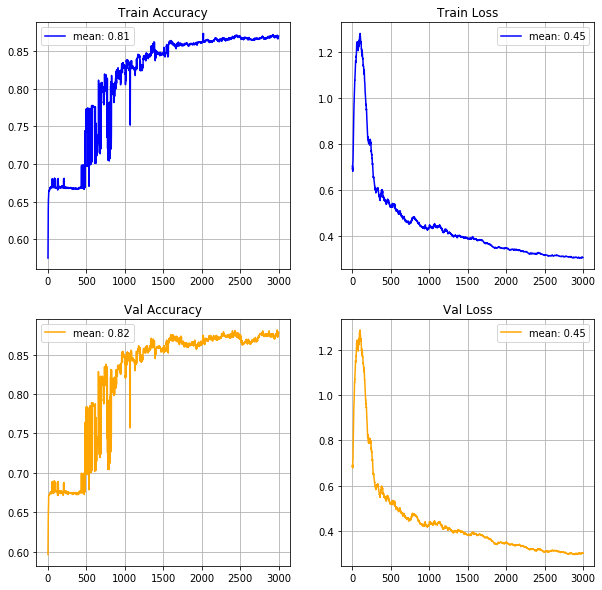

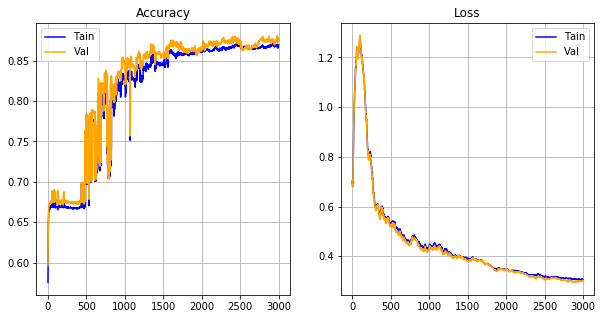

In [644]:
from matplotlib import pyplot as plt
history=[train_accuracy_history,train_loss_history,test_accuracy_history,test_loss_history]
titles = ['Train Accuracy', 'Train Loss', 'Val Accuracy', 'Val Loss']
plt.figure(figsize=(10, 10))
for i, image in enumerate(history):
    plt.subplot(2, 2, i+1)
    plt.title(titles[i])
    plt.grid()
    if i == 0 or i == 1:
        color = 'b'
    else:
        color = 'orange'
    plt.plot(image,c=color, label= 'mean: %.2f' % np.array(image).mean())
    plt.legend(loc='best')
plt.show()

# Рисуем совмещенные графики  Accuracy и Loss для Тренеровочной и валидационной выборки
titles_ = ['Accuracy','Loss']
plt.figure(figsize=(10, 5))
k=0
for i in range(2):
    plt.subplot(1, 2, i+1)
    plt.plot(history[0+k], label='Tain', c='b')
    plt.plot(history[2+k], label='Val', c='orange')
    plt.title(titles_[i])
    plt.grid()
    plt.legend(loc='best')
    k += 1


In [645]:
preds=model.forward(X_test)
m = torch.nn.Softmax(dim=1)
y_predicted=m(preds)
y_predicted=y_predicted.detach().numpy()
y_predicted

array([[0.65360845, 0.34639155],
       [0.96891989, 0.03108011],
       [0.72417781, 0.27582219],
       ...,
       [0.94871627, 0.05128373],
       [0.69594919, 0.30405081],
       [0.97531224, 0.02468776]])

In [646]:
y_predicted[:,1].shape,y_test.shape

((852,), torch.Size([852]))

In [647]:
y_predicted[:,1]

array([0.34639155, 0.03108011, 0.27582219, 0.42959182, 0.04573375,
       0.1455878 , 0.15466304, 0.47100708, 0.3272607 , 0.67704543,
       0.05128373, 0.92446131, 0.07253672, 0.61073228, 0.25545646,
       0.32014069, 0.96755409, 0.08133555, 0.31012321, 0.08526713,
       0.24362984, 0.04004374, 0.24516864, 0.24516864, 0.26096695,
       0.96755409, 0.05707902, 0.26007883, 0.05411261, 0.28456534,
       0.04268779, 0.02468776, 0.18115135, 0.30389033, 0.07253672,
       0.03978476, 0.32023548, 0.2426869 , 0.32013987, 0.94877017,
       0.36252533, 0.02496855, 0.96755409, 0.03367316, 0.89099954,
       0.03183383, 0.16588828, 0.79752953, 0.30016052, 0.92446131,
       0.02823028, 0.03756701, 0.07871363, 0.31825806, 0.32018721,
       0.04210815, 0.96755409, 0.04539822, 0.35077285, 0.07253672,
       0.26109523, 0.96755409, 0.09000096, 0.07253672, 0.05411261,
       0.02468776, 0.92446131, 0.02468776, 0.0705304 , 0.07253672,
       0.24516864, 0.96755409, 0.96755409, 0.96755409, 0.16588

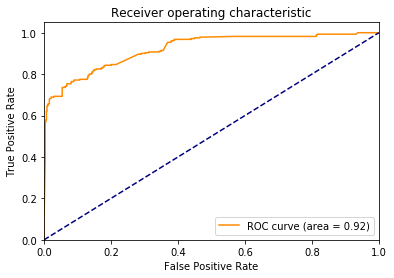

In [648]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_predicted[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()